In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import gzip
import shutil

# Sample Graph

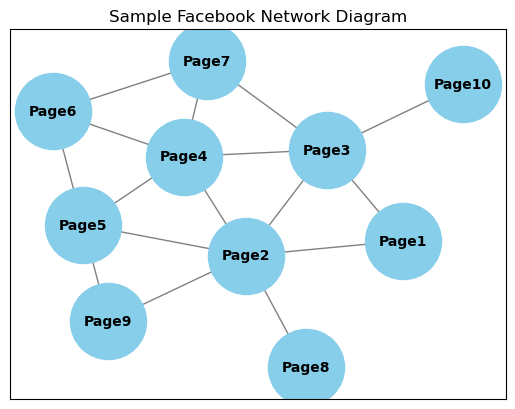

In [203]:
# Create an empty graph
S = nx.Graph()

# Add nodes representing Facebook pages
pages = ['Page1', 'Page2', 'Page3', 'Page4', 'Page5', 'Page6', 'Page7', 'Page8', 'Page9', 'Page10']
S.add_nodes_from(pages)

# Add random edges representing connections between Facebook pages
edges = [('Page1', 'Page2'), ('Page1', 'Page3'), ('Page2', 'Page3'), ('Page3', 'Page4'), ('Page4', 'Page5'),
         ('Page4', 'Page6'), ('Page5', 'Page6'), ('Page6', 'Page7'), ('Page7', 'Page3'), ('Page5', 'Page2'),
        ('Page8', 'Page2'), ('Page9', 'Page2'), ('Page10', 'Page3'), ('Page9', 'Page5'), ('Page7', 'Page4'), 
         ('Page2', 'Page4')]
S.add_edges_from(edges)

# Draw the network diagram using Kamada-Kaway layout
pos = nx.kamada_kawai_layout(S)
nx.draw_networkx(S, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray')

# Show the diagram
plt.title('Sample Facebook Network Diagram')
plt.savefig('samplenet.png')
plt.show()

## Degree of Distribution

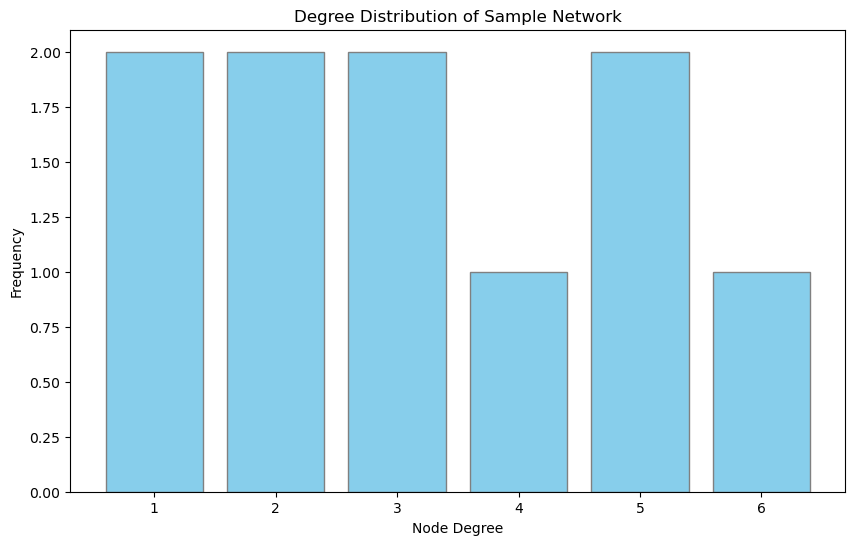

In [204]:
# Get the degrees of nodes in the graph
degrees = dict(S.degree())
degree_values = list(degrees.values())

# Calculate the degree frequency
degree_frequency = {}
for degree in degree_values:
    degree_frequency[degree] = degree_frequency.get(degree, 0) + 1

# Create a bar chart to show the degree distribution
plt.figure(figsize=(10, 6))
plt.bar(degree_frequency.keys(), degree_frequency.values(), color='skyblue', edgecolor='gray')
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Sample Network')
plt.savefig('sndegdis.png')
plt.show()

# Dataset

In [101]:
fb_targets = pd.read_csv('musae_facebook_target.csv')
fb_targets

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician
...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician
22466,22466,1651527995097082,dubdub Stories,company
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government
22468,22468,175067819212798,Tottus Perú,company


In [53]:
fb_edges = pd.read_csv('musae_facebook_edges.csv')
fb_edges

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829
...,...,...
170997,20188,20188
170998,22340,22383
170999,22348,22348
171000,5563,5563


In [175]:
fb_edges.isnull().count()

id_1    171002
id_2    171002
dtype: int64

# Network Graph

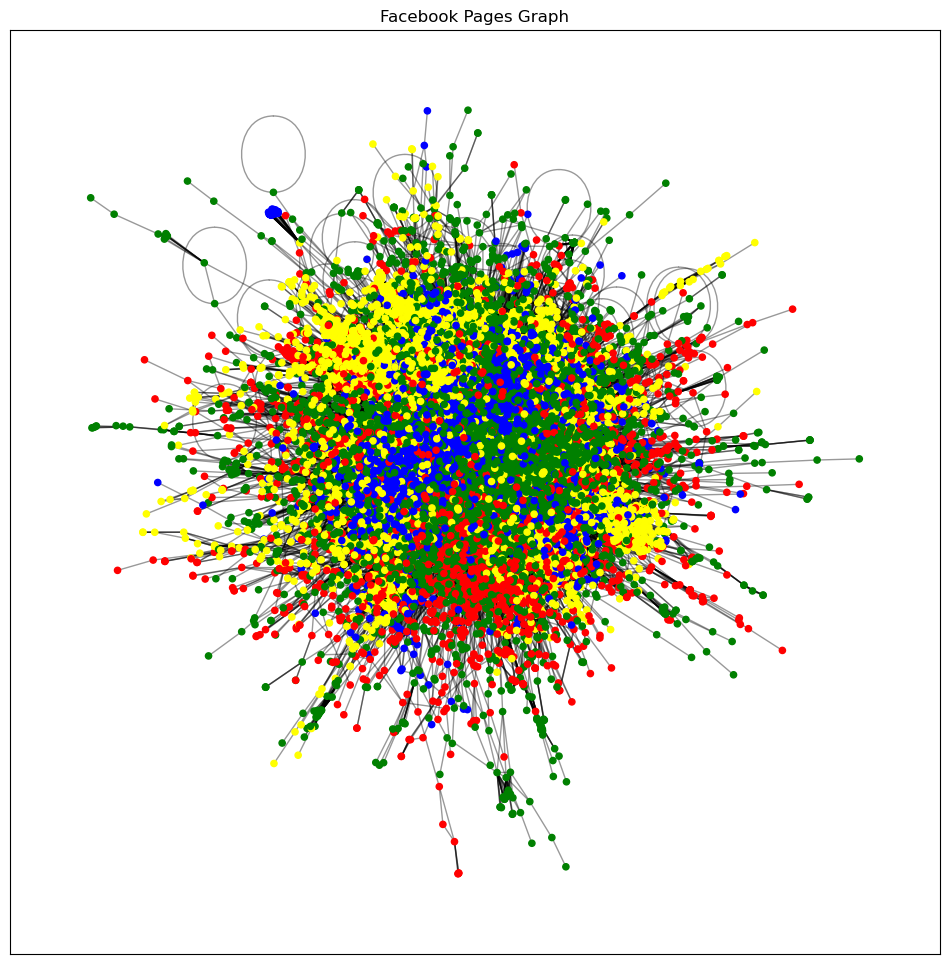

In [56]:
# Create a graph from the edges dataframe
G = nx.from_pandas_edgelist(fb_edges, 'id_1', 'id_2')

# Map page_type to colors for visualization
color_map = {
    'tvshow': 'red',
    'government': 'blue',
    'company': 'green',
    'politician': 'yellow'
}

# Add nodes attributes from targets dataframe
for _, row in fb_targets.iterrows():
    G.nodes[row['id']]['page_name'] = row['page_name']
    G.nodes[row['id']]['page_type'] = row['page_type']

# Visualization
node_colors = [color_map[G.nodes[node]['page_type']] for node in G.nodes()]

# Use spring layout
pos = nx.spring_layout(G)

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.title("Facebook Pages Graph")
plt.show()

In [114]:
# Construct the graph
G = nx.from_pandas_edgelist(fb_edges, 'id_1', 'id_2')
for _, row in fb_targets.iterrows():
    G.nodes[row['id']]['page_type'] = row['page_type']

# Statistics for the original graph
num_nodes_G = G.number_of_nodes()
num_edges_G = G.number_of_edges()
avg_degree_G = sum(dict(G.degree()).values()) / num_nodes_G

print("Original Graph:")
print(f"Nodes: {num_nodes_G}")
print(f"Edges: {num_edges_G}")
print(f"Average Degree: {avg_degree_G:.2f}")

Original Graph:
Nodes: 22470
Edges: 171002
Average Degree: 15.22


# Largest Connected Component(LCC)

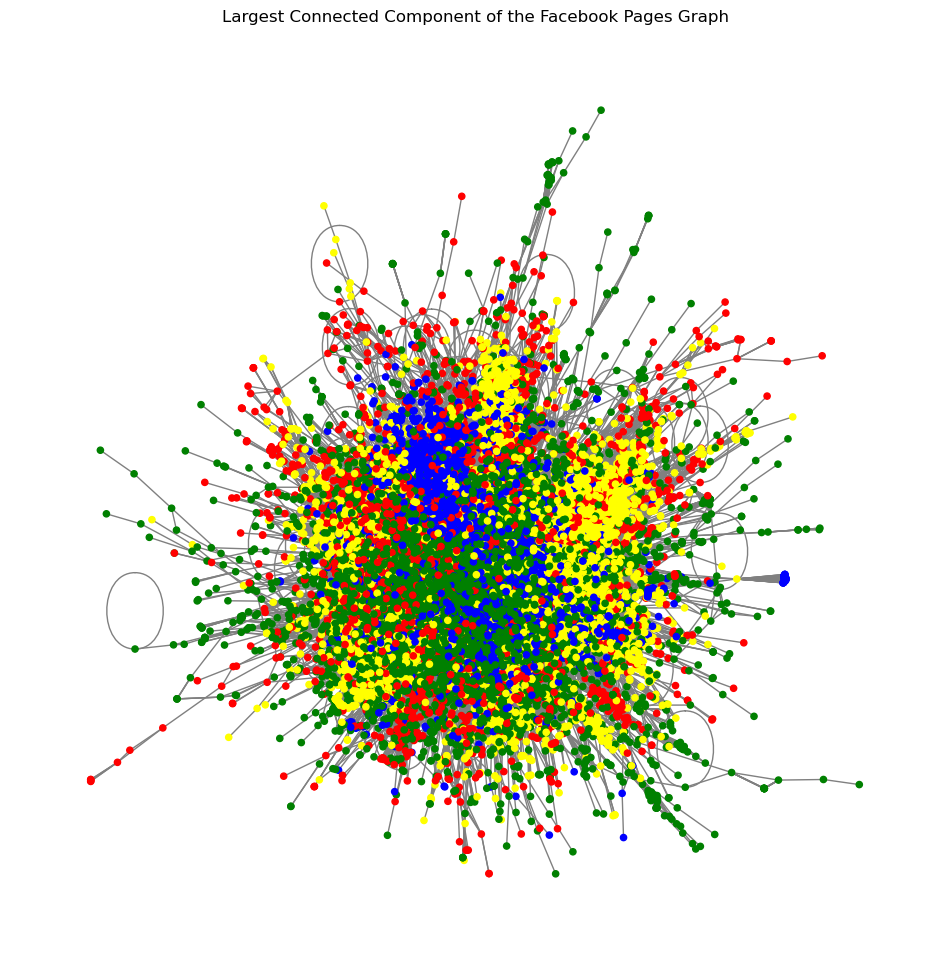

In [67]:
# Create the graph
G = nx.from_pandas_edgelist(fb_edges, 'id_1', 'id_2')
for _, row in fb_targets.iterrows():
    G.nodes[row['id']]['page_type'] = row['page_type']

# Extract the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
LCC = G.subgraph(largest_cc)

# Visualize the LCC
color_map = {
    'tvshow': 'red',
    'government': 'blue',
    'company': 'green',
    'politician': 'yellow'
}
node_colors = [color_map[LCC.nodes[node]['page_type']] for node in LCC.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(LCC)
nx.draw_networkx(LCC, pos, node_color=node_colors, with_labels=False, node_size=20, edge_color="grey")
plt.title("Largest Connected Component of the Facebook Pages Graph")
plt.axis('off')
plt.show()

In [115]:
# Extract the largest connected component and fetch its statistics
largest_cc = max(nx.connected_components(G), key=len)
LCC = G.subgraph(largest_cc)
num_nodes_LCC = LCC.number_of_nodes()
num_edges_LCC = LCC.number_of_edges()
avg_degree_LCC = sum(dict(LCC.degree()).values()) / num_nodes_LCC

print("\nLCC Graph:")
print(f"Nodes: {num_nodes_LCC}")
print(f"Edges: {num_edges_LCC}")
print(f"Average Degree: {avg_degree_LCC:.2f}")


LCC Graph:
Nodes: 22470
Edges: 171002
Average Degree: 15.22


# Minimum Degree

### Threshold at 80%

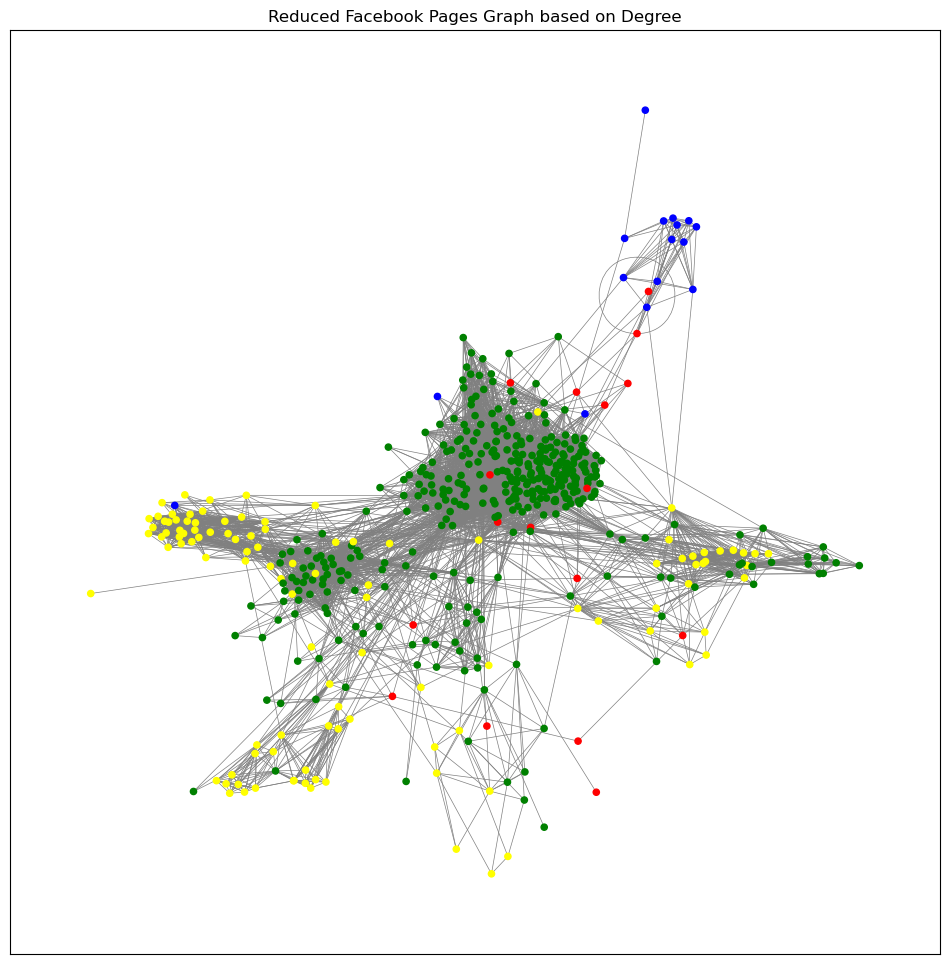

In [85]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph from the dataset
G = nx.from_pandas_edgelist(fb_edges, 'id_1', 'id_2')

# Add attributes to nodes
attributes = fb_targets.set_index('id').to_dict('index')
nx.set_node_attributes(G, attributes)

# Apply Degree-Based Thresholding
min_degree = 80 
nodes_to_remove = [node for node, degree in G.degree() if degree < min_degree]
G_reduced = G.copy()
G_reduced.remove_nodes_from(nodes_to_remove)

# Display the reduced graph
plt.figure(figsize=(12, 12))
color_map = {
    'tvshow': 'blue',
    'government': 'green',
    'company': 'red',
    'politician': 'yellow'
}
node_colors = [color_map[G_reduced.nodes[node]['page_type']] for node in G_reduced.nodes()]
nx.draw_networkx(G_reduced, node_color=node_colors, node_size=20, with_labels=False, edge_color='gray', width=0.5)
plt.title('Reduced Facebook Pages Graph based on Degree')
plt.show()

### Threshold at 150

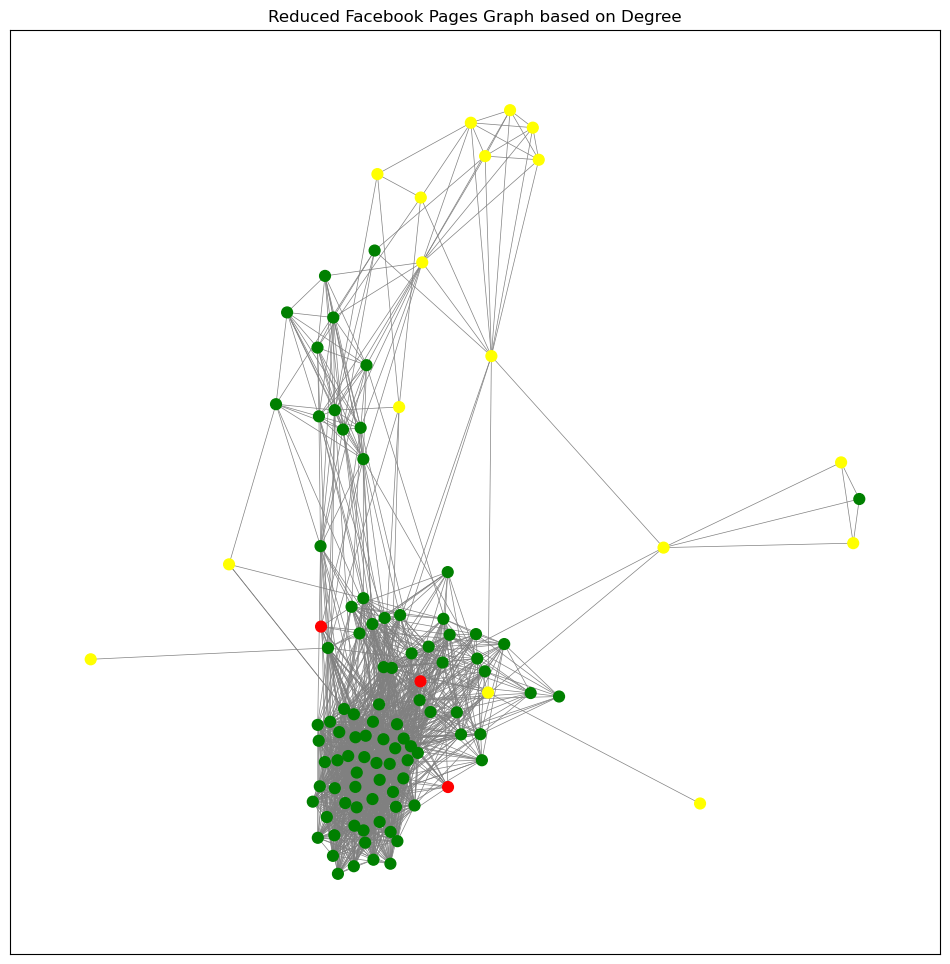

In [205]:
# Create the graph from the dataset
G = nx.from_pandas_edgelist(fb_edges, 'id_1', 'id_2')

# Add attributes to nodes
attributes = fb_targets.set_index('id').to_dict('index')
nx.set_node_attributes(G, attributes)

# Apply Degree-Based Thresholding
min_degree = 150  # Let's say we choose a threshold of 50 for illustration
nodes_to_remove = [node for node, degree in G.degree() if degree < min_degree]
G_reduced = G.copy()
G_reduced.remove_nodes_from(nodes_to_remove)

# Display the reduced graph
plt.figure(figsize=(12, 12))
color_map = {
    'tvshow': 'blue',
    'government': 'green',
    'company': 'red',
    'politician': 'yellow'
}
node_colors = [color_map[G_reduced.nodes[node]['page_type']] for node in G_reduced.nodes()]
nx.draw_networkx(G_reduced, node_color=node_colors, node_size=60, with_labels=False, edge_color='gray', width=0.5)
plt.title('Reduced Facebook Pages Graph based on Degree')
plt.savefig('rdg_150.png')
plt.show()

In [149]:
num_nodes = G_reduced.number_of_nodes()
num_edges = G_reduced.number_of_edges()

print("Number of Nodes:", num_nodes)
print("Number of Edges:", num_edges)

Number of Nodes: 111
Number of Edges: 1625


# Centrality Measures

## Degree Centrality

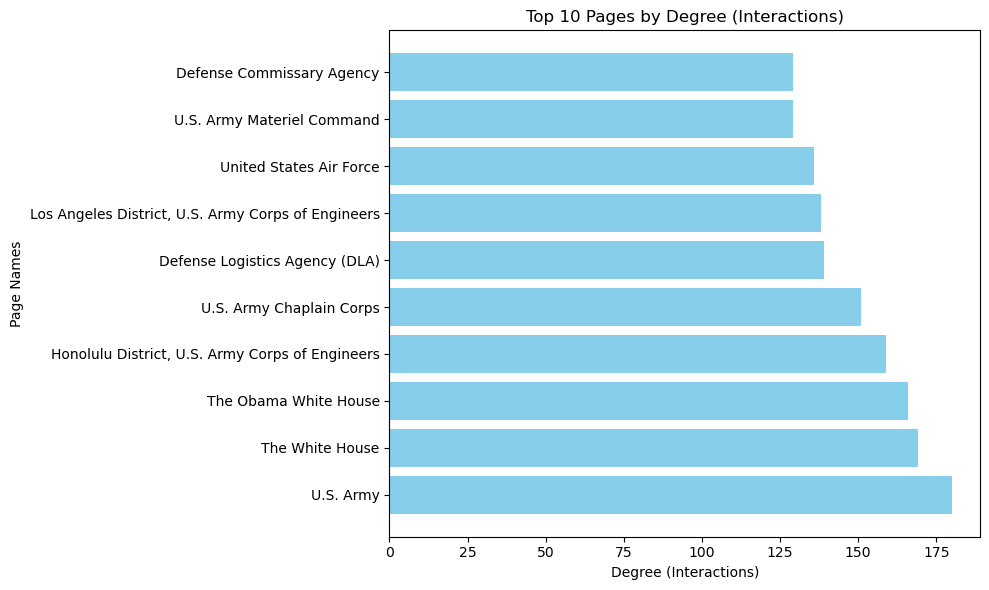

In [139]:
# Create a mapping from node IDs to page names
id_to_name = dict(zip(fb_targets['id'], fb_targets['page_name']))

# Calculate degrees of nodes
degrees = dict(G_reduced.degree())

# Sort nodes by degree and get the top 10
top_10_nodes = sorted(degrees, key=degrees.get, reverse=True)[:10]

# Get the names of the top 10 nodes
top_10_names = [id_to_name[node] for node in top_10_nodes]

# Get the degrees of the top 10 nodes
top_10_degrees = [degrees[node] for node in top_10_nodes]

# Create a horizontal bar chart of the top 10 nodes
plt.figure(figsize=(10, 6))
plt.barh(top_10_names, top_10_degrees, color='skyblue')
plt.xlabel('Degree (Interactions)')
plt.ylabel('Page Names')
plt.title('Top 10 Pages by Degree (Interactions)')
plt.tight_layout()
plt.show()

In [157]:
# Code snippet to count each colored node
color_counts = dict(zip(color_map.values(), [0]*len(color_map)))
for color in node_colors:
    color_counts[color] += 1

print(color_counts)

{'blue': 0, 'green': 91, 'red': 3, 'yellow': 17}


## Betweenness Centrality

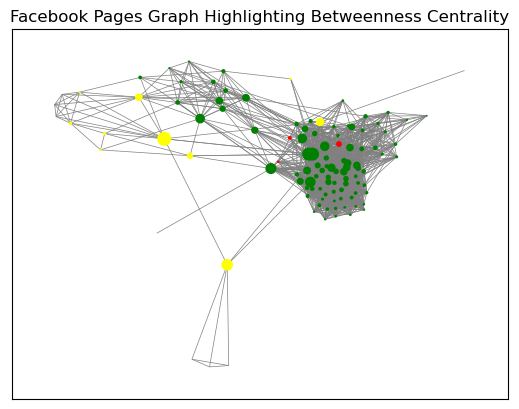

In [159]:
betweenness_centrality = nx.betweenness_centrality(G_reduced)
node_sizes = [betweenness_centrality[node] * 1000 for node in G_reduced.nodes()]
nx.draw_networkx(G_reduced, node_color=node_colors, node_size=node_sizes, with_labels=False, edge_color='gray', width=0.5)
plt.title('Facebook Pages Graph Highlighting Betweenness Centrality')
plt.show()

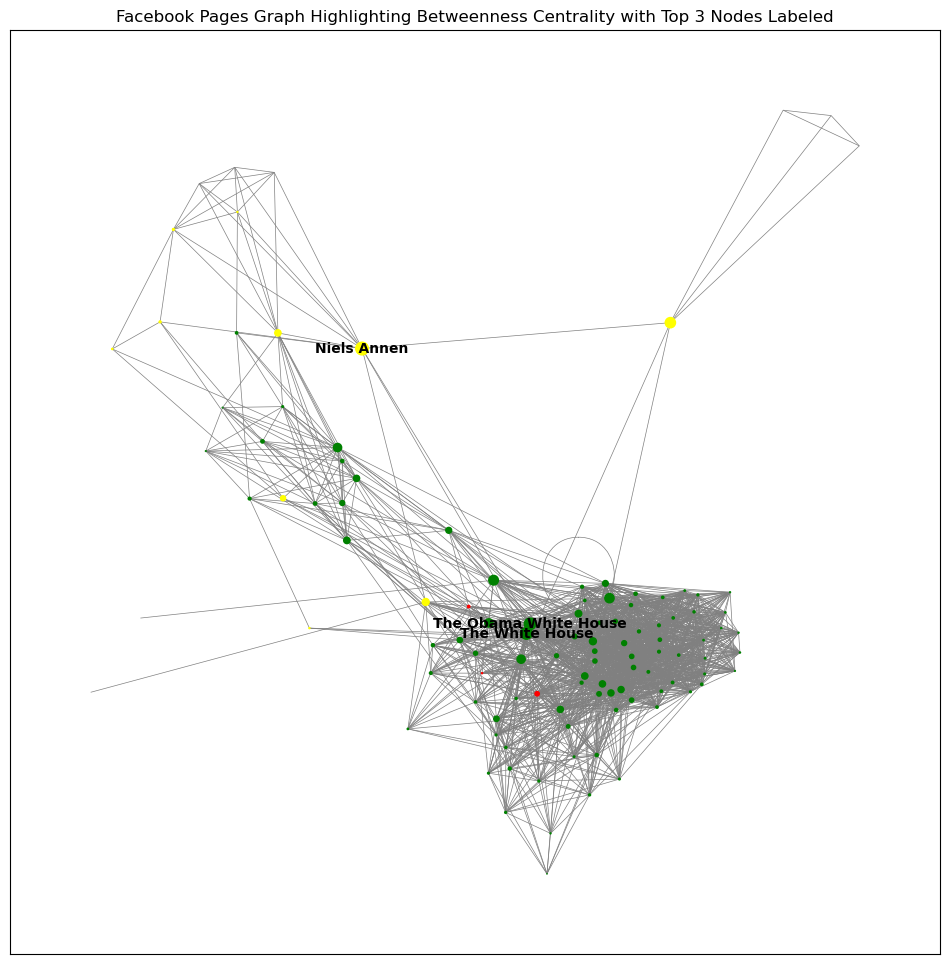

In [202]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_reduced)
node_sizes = [betweenness_centrality[node] * 1000 for node in G_reduced.nodes()]
# Get the top 3 nodes based on betweenness centrality score
top_3_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:3]

# Create a mapping from node IDs to page names
id_to_name = {node: G_reduced.nodes[node]['page_name'] for node in G_reduced.nodes()}

# Add labels only for the top 3 nodes
labels = {node: id_to_name[node] for node in top_3_nodes}

# Draw the graph with labels
plt.figure(figsize=(12, 12))
nx.draw_networkx(G_reduced, labels=labels, node_color=node_colors, node_size=node_sizes, with_labels=True, font_size=10, font_weight='bold', edge_color='gray', width=0.5)
plt.title('Facebook Pages Graph Highlighting Betweenness Centrality with Top 3 Nodes Labeled')
plt.show()

In [199]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_reduced)

# Get the top 3 nodes based on betweenness centrality score
top_3_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:3]

# Create a mapping from node IDs to page names
id_to_name = {node: G_reduced.nodes[node]['page_name'] for node in G_reduced.nodes()}

print("Top 3 Nodes by Betweenness Centrality:")
for node in top_3_nodes:
    print(f"Page Name: {id_to_name[node]}, Betweenness Centrality Score: {betweenness_centrality[node]}")

Top 3 Nodes by Betweenness Centrality:
Page Name: Niels Annen, Betweenness Centrality Score: 0.08350368711255679
Page Name: The White House, Betweenness Centrality Score: 0.07103345883813214
Page Name: The Obama White House, Betweenness Centrality Score: 0.07057330656934965


## Closeness Centrality

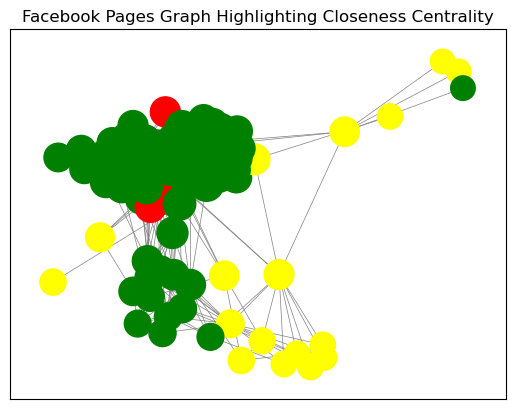

In [155]:
closeness_centrality = nx.closeness_centrality(G_reduced)
node_sizes = [closeness_centrality[node] * 1000 for node in G_reduced.nodes()]
nx.draw_networkx(G_reduced, node_color=node_colors, node_size=node_sizes, with_labels=False, edge_color='gray', width=0.5)
plt.title('Facebook Pages Graph Highlighting Closeness Centrality')
plt.show()

In [176]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G_reduced)
# Get the top 3 nodes based on closeness centrality score
top_3_nodes_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:3]
print("Top 3 Nodes by Closeness Centrality:")
for node in top_3_nodes_closeness:
    print(f"Page Name: {id_to_name[node]}, Closeness Centrality Score: {closeness_centrality[node]}")

Top 3 Nodes by Closeness Centrality:
Page Name: The White House, Closeness Centrality Score: 0.650887573964497
Page Name: The Obama White House, Closeness Centrality Score: 0.650887573964497
Page Name: U.S. Army, Closeness Centrality Score: 0.6432748538011696


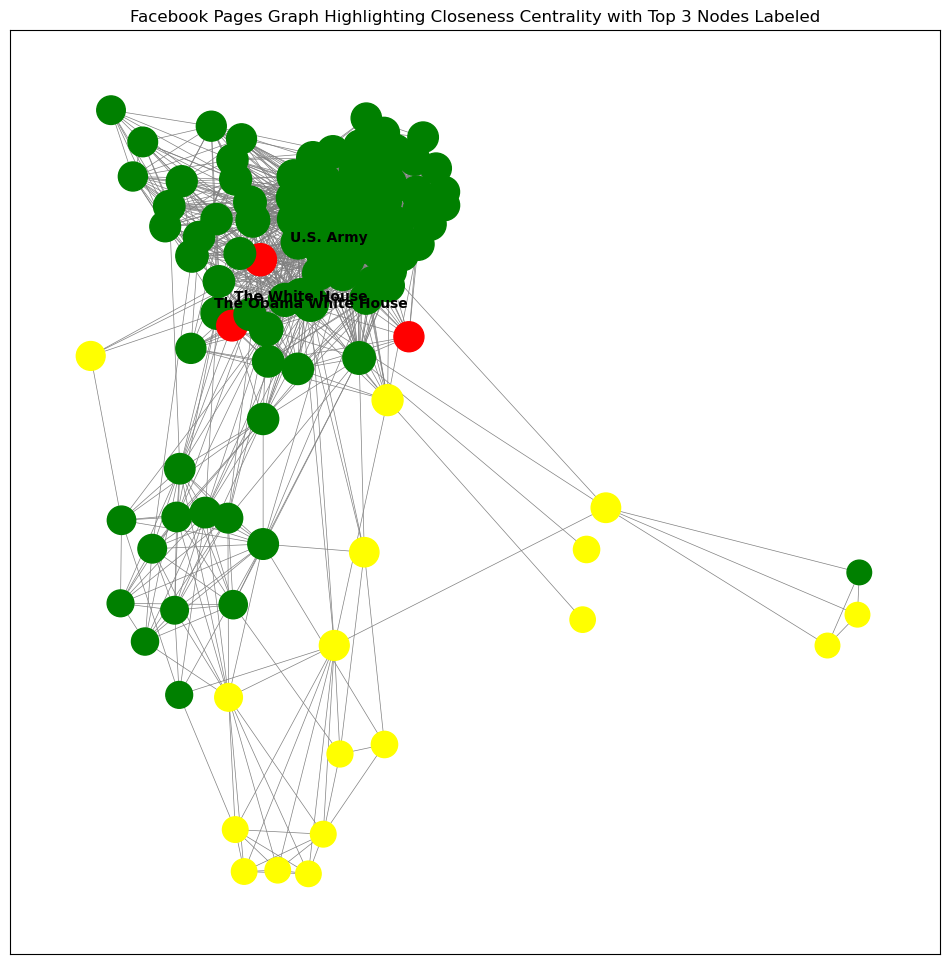

In [177]:
# Calculate closeness centrality
node_sizes = [closeness_centrality[node] * 1000 for node in G_reduced.nodes()]

# Create a mapping from node IDs to page names
id_to_name = {node: G_reduced.nodes[node]['page_name'] for node in G_reduced.nodes()}

# Add labels only for the top 3 nodes
labels = {node: id_to_name[node] for node in top_3_nodes_closeness}

# Draw the graph with labels
plt.figure(figsize=(12, 12))
nx.draw_networkx(G_reduced, labels=labels, node_color=node_colors, node_size=node_sizes, with_labels=True, font_size=10, font_weight='bold', edge_color='gray', width=0.5)
plt.title('Facebook Pages Graph Highlighting Closeness Centrality with Top 3 Nodes Labeled')
plt.show()

## Eigenvector Centrality

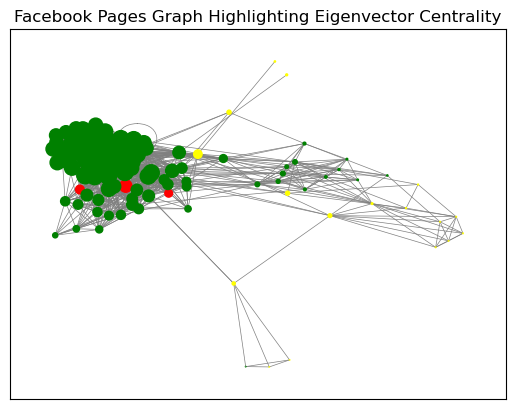

In [156]:
eigenvector_centrality = nx.eigenvector_centrality(G_reduced)
node_sizes = [eigenvector_centrality[node] * 1000 for node in G_reduced.nodes()]
nx.draw_networkx(G_reduced, node_color=node_colors, node_size=node_sizes, with_labels=False, edge_color='gray', width=0.5)
plt.title('Facebook Pages Graph Highlighting Eigenvector Centrality')
plt.show()

In [178]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G_reduced, max_iter=500)
# Get the top 3 nodes based on eigenvector centrality score
top_3_nodes_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:3]
print("Top 3 Nodes by Eigenvector Centrality:")
for node in top_3_nodes_eigenvector:
    print(f"Page Name: {id_to_name[node]}, Eigenvector Centrality Score: {eigenvector_centrality[node]}")

Top 3 Nodes by Eigenvector Centrality:
Page Name: U.S. Army, Eigenvector Centrality Score: 0.17272326521510797
Page Name: Honolulu District, U.S. Army Corps of Engineers, Eigenvector Centrality Score: 0.17073264092962398
Page Name: Defense Logistics Agency (DLA), Eigenvector Centrality Score: 0.16951646722021688


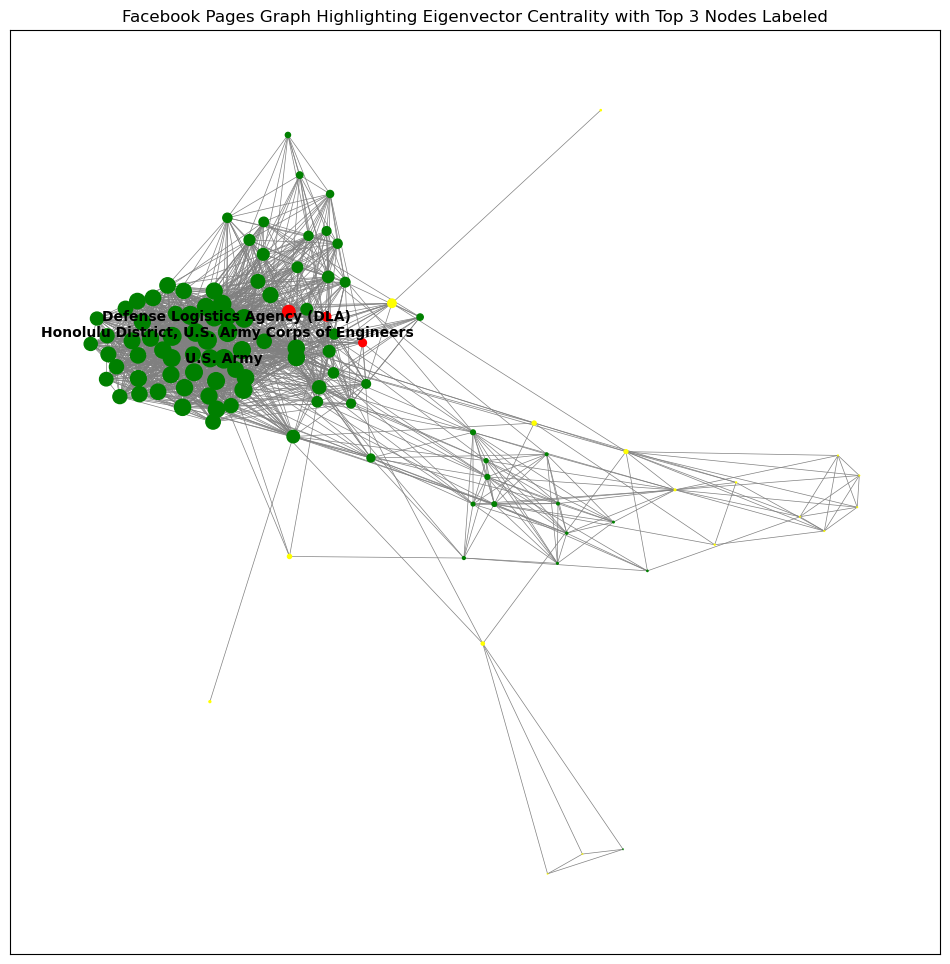

In [183]:
# Calculate eigenvector centrality
node_sizes = [eigenvector_centrality[node] * 1000 for node in G_reduced.nodes()]

# Create a mapping from node IDs to page names
id_to_name = {node: G_reduced.nodes[node]['page_name'] for node in G_reduced.nodes()}

# Add labels only for the top 3 nodes
labels = {node: id_to_name[node] for node in top_3_nodes_eigenvector}

# Draw the graph with labels
plt.figure(figsize=(12, 12))
nx.draw_networkx(G_reduced, labels=labels, node_color=node_colors, node_size=node_sizes, with_labels=True, font_size=10, font_weight='bold', edge_color='gray', width=0.5)
plt.title('Facebook Pages Graph Highlighting Eigenvector Centrality with Top 3 Nodes Labeled')
plt.show()

# Additional EDA

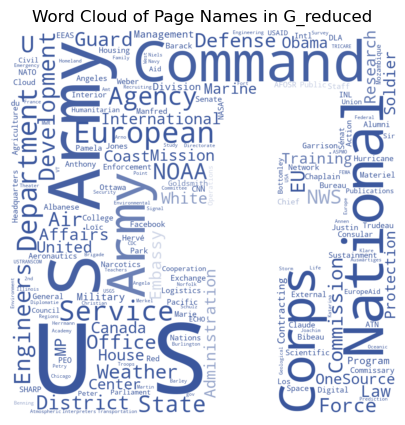

In [206]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

# Load the image and convert it to a numpy array
facebook_logo = Image.open('Facebook_logo_(square).png')
facebook_logo_np = np.array(facebook_logo)

# Get the page names from G_reduced
page_names = [G_reduced.nodes[node]['page_name'] for node in G_reduced.nodes()]

# Join the page names into a single string
text = ' '.join(page_names)

# Create the WordCloud object and set the mask
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=facebook_logo_np).generate(text)

# Create a color map from the image
image_colors = ImageColorGenerator(facebook_logo_np)
wordcloud_recolored = wordcloud.recolor(color_func=image_colors)

# Display the word cloud with the mask
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_recolored, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Page Names in G_reduced')
plt.savefig('wcfbns.png')
plt.show()